In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="qWtYpecIymCMCgjSKhtO")
project = rf.workspace("placassinaloa").project("placadesinaloa-lcbjy")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 73.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PlacaDeSinaloa-2 in yolov11:: 100%|██████████| 196/196 [00:00<00:00, 6085.99it/s]


In [2]:
!pip install ultralytics # descarga bibloteca para entrenar yolo
from ultralytics import YOLO # importar la clase yolo
model = YOLO("yolo11n.pt") # se carga el modelo

# manda a entrenar
model.train(
    data="PlacaDeSinaloa-2/data.yaml",
    epochs=25,
    imgsz=512
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=PlacaDeSinaloa-2/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=Fals

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd7b944aae0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [3]:
from google.colab import files  # se usa para subir imagenes
uploaded = files.upload()

Saving placa2.jpg to placa2.jpg
Saving placa1.jpg to placa1.jpg
Saving placa3.jpg to placa3.jpg



image 1/1 /content/placa1.jpg: 512x512 1 placa, 159.2ms
Speed: 2.5ms preprocess, 159.2ms inference, 1.3ms postprocess per image at shape (1, 3, 512, 512)


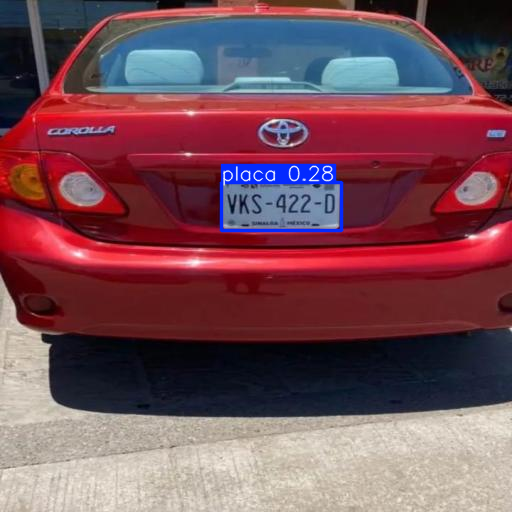

In [9]:
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

modelo = YOLO("/content/runs/detect/train/weights/best.pt") # cargamos el modelo ya entrenado
imagen = "/content/placa1.jpg" # cargamos la imagen

resultado = modelo(imagen)
f = resultado[0].plot()

cv2_imshow(f)



In [10]:
!sudo apt install tesseract-ocr  # nos permite leer texto de las fotos
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [14]:
from ultralytics import YOLO # para detectar la placa
import cv2 # recortar imagenes
import pytesseract # para poder leer el texto de la placa

modelo = YOLO("/content/runs/detect/train/weights/best.pt") # cargamos el modelo
imagen = cv2.imread("/content/placa1.jpg") # cargamos la imagen
resultado = modelo(imagen) # usamos modelo para dectetar la placa

for r in resultado:
    for box in r.boxes:
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int) # Obtener la cordenada de la placa
        placa = imagen[y1:y2, x1:x2] # Recorta la placa de la imagen
        cv2.imwrite("placa_recortada.jpg", placa) # se uardar la placa recortada

        # Preparar la imagen para que OCR lea mejor
        gray = cv2.cvtColor(placa, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, None, fx=2, fy=2)
        gray = cv2.GaussianBlur(gray, (3,3), 0)

        texto = pytesseract.image_to_string(gray, config="--psm 7") # Se aplicar OCR y Tesseract

        print("PLACA:", texto) # muestra el texto





0: 512x512 1 placa, 231.8ms
Speed: 2.6ms preprocess, 231.8ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 512)
PLACA: VKS-422-D

